In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy.optimize import curve_fit

In [2]:
null,PCtemp = np.genfromtxt('PC.lvm', delimiter="\t", unpack=True, skip_header=0)
null,PCtemp2 = np.genfromtxt('PC2.lvm', delimiter="\t", unpack=True, skip_header=0)




#Kp has units of W/K
#Ki has units of W/K2
#KD has units of W

In [3]:
time = np.linspace(0, 100, 1172)

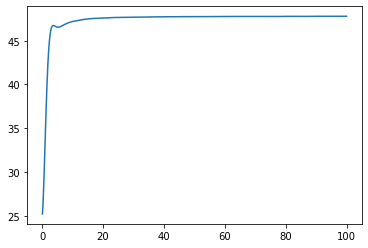

In [15]:
plt.plot(time, PCtemp)
plt.xlabel("Kp (W/C)")
plt.ylabel("Temperature (C)")
#plt.ylim(55,60)

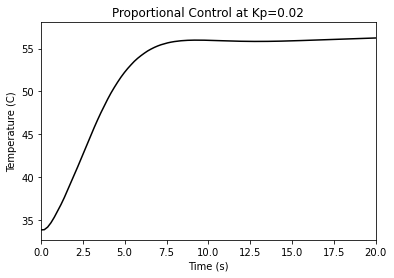

In [24]:
time2 = np.linspace(0, 100, 503)
plt.xlim(0,20)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (C)")
plt.title("Proportional Control at Kp=0.02")
#plt.ylim(55,60)

plt.plot(time2, PCtemp2, 'k-')

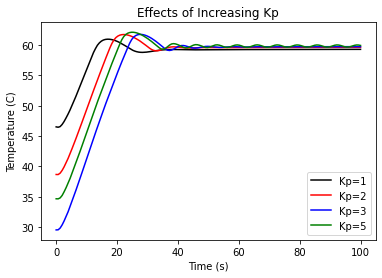

In [6]:
null,kp1 = np.genfromtxt('KP1.lvm', delimiter="\t", unpack=True, skip_header=0)
null,kp2 = np.genfromtxt('KP2.lvm', delimiter="\t", unpack=True, skip_header=0)
null,kp5 = np.genfromtxt('KP5.lvm', delimiter="\t", unpack=True, skip_header=0)
null,kp3 = np.genfromtxt('KP3.lvm', delimiter="\t", unpack=True, skip_header=0)



time3 = np.linspace(0, 100, 156)
time4 = np.linspace(0, 100, 154)
#time5 = np.linspace(0, 100, 503)
#plt.xlim(0,20)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (C)")
plt.title("Effects of Increasing Kp")
plt.plot(time3, kp1, 'k-', label = "Kp=1")
plt.plot(time4, kp2, 'r-', label = "Kp=2")
plt.plot(time4, kp3, 'b-', label = "Kp=3")
plt.plot(time4, kp5, 'g-', label = "Kp=5")
plt.legend()
plt.show()
#plt.ylim(55,60)



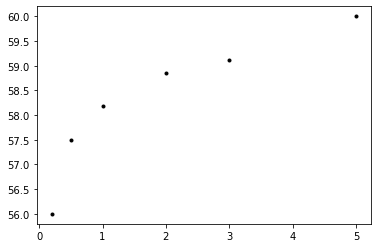

In [65]:
tavg = [58.85,58.18,56.74,57.74]
kp = [1,2,3,5]

tavg = [56,57.5,58.18,58.85,59.12,60]
kp = [0.2,0.5,1,2,3,5]

plt.plot(kp,tavg, 'k.')

Text(0.5, 1.0, 'Plot of Tavg vs Kp')

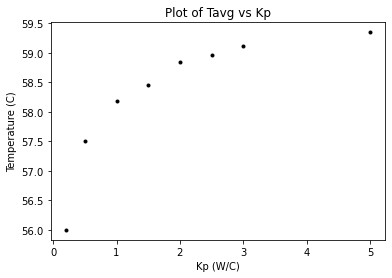

In [20]:
tavg = [56,57.5,58.18,58.46,58.85,58.96,59.12,59.35]
kp = [0.2,0.5,1,1.5,2,2.5,3,5]

plt.plot(kp,tavg, 'k.')

plt.xlabel("Kp (W/C)")
plt.ylabel("Temperature (C)")
plt.title("Plot of Tavg vs Kp")


Chi squared = 
519255.9424745136
C = 
0.5843938551196893
lambda = 
0.02051021891685299
setpoint = 
59.16646388512715


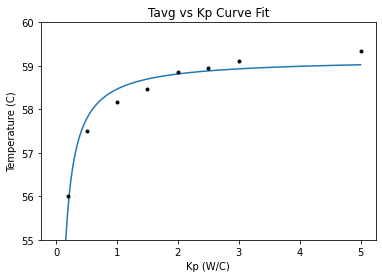

In [12]:
#tavg = [58.85,58.18,56.74,57.74]
#kp = [1,2,3,5]

#tavg = [56,57.5,58.18,58.85,59.12,59.35]
#kp = [0.2,0.5,1,2,3,5]

tavg = [56,56.4,57.5,58.18,58.46,58.85,58.96,59.12,59.35]
kp = [0.2,0.3,0.5,1,1.5,2,2.5,3,5]

tavg = [56,57.5,58.18,58.46,58.85,58.96,59.12,59.35]
kp = [0.2,0.5,1,1.5,2,2.5,3,5]

kpline = np.linspace(0,5,1000)

from scipy.optimize import curve_fit

#function 
def Tavg(Kp, C, y, Ts):
    return(Ts * (Kp / (C * y + Kp)))



# C is capacitance, y is lambda and Ts is setpoint

C_init = 0.7
y_init = 0.03
Ts_init = 60



error = 0.000875





pOpt, pCov = curve_fit(Tavg, kp, tavg, [C_init, y_init, Ts_init], sigma = np.ones(len(kp)) * error, absolute_sigma = True,maxfev=5000)
C_opt = pOpt[0]
y_opt = pOpt[1]
Ts_opt = pOpt[2]






plt.plot(kpline,Tavg(kpline, C_opt, y_opt, Ts_opt))
plt.plot(kp, tavg,'k.')
plt.xlabel("Kp (W/C)")
plt.ylabel("Temperature (C)")
plt.title("Tavg vs Kp Curve Fit")
plt.ylim(55,60)


         
residual_Std = np.std((tavg - Tavg(kp, C_opt, y_opt, Ts_opt)))
Residuals = (tavg - Tavg(kp, C_opt, y_opt, Ts_opt))
chisq2 = np.sum((Residuals / error) ** 2)
print("Chi squared = ")
print(chisq2)
print("C = ")
print(C_opt)
print("lambda = ")
print(y_opt)
print("setpoint = ")
print(Ts_opt)
         
         
         


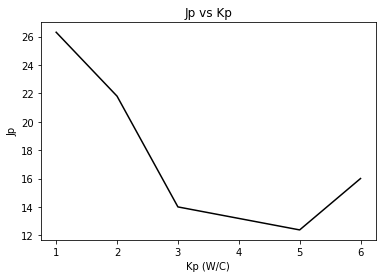

In [19]:
#jp = [12.3817,21.8146,30.7517,26.3008]
kp = [1,2,3,5,6]
jp = [26.3008,21.8,14,12.38,16]

plt.xlabel("Kp (W/C)")
plt.ylabel("Jp")
plt.title("Jp vs Kp")
#plt.ylim(55,60)

plt.plot(kp,jp, 'k-')

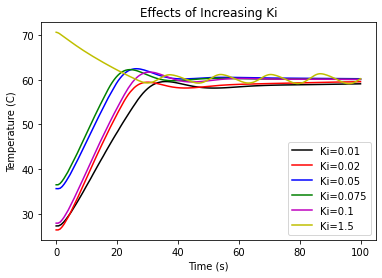

In [21]:
null,ki001 = np.genfromtxt('KI0.01.lvm', delimiter="\t", unpack=True, skip_header=0)
null,ki002 = np.genfromtxt('KI0.02.lvm', delimiter="\t", unpack=True, skip_header=0)
null,ki005 = np.genfromtxt('KI0.05.lvm', delimiter="\t", unpack=True, skip_header=0)
null,ki0075 = np.genfromtxt('KI0.075.lvm', delimiter="\t", unpack=True, skip_header=0)
null,ki01 = np.genfromtxt('KI0.1.lvm', delimiter="\t", unpack=True, skip_header=0)
null,ki15 = np.genfromtxt('KI1.5.lvm', delimiter="\t", unpack=True, skip_header=0)



time1 = np.linspace(0, 100, 124)
time2 = np.linspace(0, 100, 153)
time3 = np.linspace(0, 100, 159)
time4 = np.linspace(0, 100, 200)
#time5 = np.linspace(0, 100, 503)
#plt.xlim(0,20)

plt.plot(time1, ki001, 'k-', label="Ki=0.01")
plt.plot(time2, ki002, 'r-', label="Ki=0.02")
plt.plot(time2, ki005, 'b-', label="Ki=0.05")
plt.plot(time3, ki0075, 'g-', label="Ki=0.075")
plt.plot(time2, ki01, 'm-', label = "Ki=0.1")
plt.plot(time4, ki15, 'y-', label="Ki=1.5")

#use m

plt.xlabel("Time (s)")
plt.ylabel("Temperature (C)")
plt.title("Effects of Increasing Ki")
plt.legend()
plt.show()
#plt.ylim(55,60)

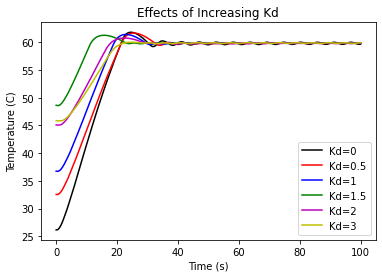

In [23]:
null,kd0 = np.genfromtxt('KD0.lvm', delimiter="\t", unpack=True, skip_header=0)
null,kd05 = np.genfromtxt('KD0.5.lvm', delimiter="\t", unpack=True, skip_header=0)
null,kd1 = np.genfromtxt('KD1.lvm', delimiter="\t", unpack=True, skip_header=0)
null,kd15 = np.genfromtxt('KD1.5.lvm', delimiter="\t", unpack=True, skip_header=0)
null,kd2 = np.genfromtxt('KD2.lvm', delimiter="\t", unpack=True, skip_header=0)
null,kd3 = np.genfromtxt('KD3.lvm', delimiter="\t", unpack=True, skip_header=0)



time1 = np.linspace(0, 100, 184)
time2 = np.linspace(0, 100, 153)
time3 = np.linspace(0, 100, 121)
time4 = np.linspace(0, 100, 105)
#time5 = np.linspace(0, 100, 503)
#plt.xlim(0,20)

plt.plot(time1, kd0, 'k-', label="Kd=0")
plt.plot(time2, kd05, 'r-', label="Kd=0.5")
plt.plot(time2, kd1, 'b-', label="Kd=1")
plt.plot(time2, kd15, 'g-', label="Kd=1.5")
plt.plot(time3, kd2, 'm-', label="Kd=2")
plt.plot(time4, kd3, 'y-', label="Kd=3")




plt.xlabel("Time (s)")
plt.ylabel("Temperature (C)")
plt.title("Effects of Increasing Kd")
plt.legend()
plt.show()
#plt.ylim(55,60)